# Домашнее задание "Функции потерь и оптимизация"


Прочитать про методы оптимизации для нейронных сетей https: // habr.com/post/318970/
Реализовать самостоятельно логистическую регрессию
Обучить ее методом градиентного спуска
Методом nesterov momentum
Методом rmsprop

Дополнительное задание *
В качестве dataset’а взять Iris, оставив 2 класса:
Iris Versicolor
Iris Virginica


In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold


In [90]:
class logistic_regression():
    def __init__(self):
        pass

    def sigmoid(self, x):
        z = 1 / (1 + np.exp(-x))
        return z

    def initialize_params(self, dims):
        W = np.zeros((dims, 1))
        b = 0
        return W, b

    def logistic(self, X, y, W, b):
        num_train = X.shape[0]
        num_feature = X.shape[1]

        a = self.sigmoid(np.dot(X, W) + b)
        cost = -1 / num_train * np.sum(y * np.log(a) + (1 - y) * np.log(1 - a))

        dW = np.dot(X.T, (a - y)) / num_train
        db = np.sum(a - y) / num_train
        cost = np.squeeze(cost)
        return a, cost, dW, db

    def logistic_train(self, X, y, learning_rate, epochs):
        W, b = self.initialize_params(X.shape[1])
        cost_list = []
        for i in range(epochs):
            a, cost, dW, db = self.logistic(X, y, W, b)
            W = W - learning_rate * dW
            b = b - learning_rate * db
            if i % 100 == 0:
                cost_list.append(cost)
            if i % 100 == 0:
                print('epoch %d cost %f' % (i, cost))

        params = {
            'W': W,
            'b': b
        }
        grads = {
            'dW': dW,
            'db': db
        }

        return cost_list, params, grads

    def predict(self, X, params):
        y_prediction = self.sigmoid(np.dot(X, params['W']) + params['b'])
        for i in range(len(y_prediction)):
            if y_prediction[i] > 0.5:
                y_prediction[i] = 1
            else:
                y_prediction[i] = 0

        return y_prediction

    def accuracy(self, y_test, y_pred):
        correct_count = 0
        for i in range(len(y_test)):
            for j in range(len(y_pred)):
                if y_test[i] == y_pred[j] and i == j:
                    correct_count += 1

        accuracy_score = correct_count / len(y_test)
        return accuracy_score    

In [91]:
def generate_test_data():
    X, labels = make_classification(
        n_samples=100, n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=2)
    labels = labels.reshape((-1, 1))
    offset = int(X.shape[0] * 0.9)
    X_train, y_train = X[:offset], labels[:offset]
    X_test, y_test = X[offset:], labels[offset:]
    return X_train, y_train, X_test, y_test

In [92]:
def visualize_logistic(X_train, y_train, params):
    n = X_train.shape[0]

    xcord1 = []
    ycord1 = []
    xcord2 = []
    ycord2 = []

    for i in range(n):
        if y_train[i] == 1:
            xcord1.append(X_train[i][0])
            ycord1.append(X_train[i][1])
        else:
            xcord2.append(X_train[i][0])
            ycord2.append(X_train[i][1])

    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.scatter(xcord1, ycord1, s=32, c='red')
    ax.scatter(xcord2, ycord2, s=32, c='green')

    x = np.arange(-1.5, 3, 0.1)
    y = (-params['b'] - params['W'][0] * x) / params['W'][1]

    ax.plot(x, y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()


(90, 2) (90, 1) (10, 2) (10, 1)
epoch 0 cost 0.693147
epoch 100 cost 0.521480
epoch 200 cost 0.416359
epoch 300 cost 0.347951
epoch 400 cost 0.300680
epoch 500 cost 0.266327
epoch 600 cost 0.240328
epoch 700 cost 0.220002
epoch 800 cost 0.203687
epoch 900 cost 0.190306
{'W': array([[ 2.04608084],
       [-0.03964634]]), 'b': 0.12335926234285084}
train accuracy is: 0.9666666666666667
test accuracy is: 1.0


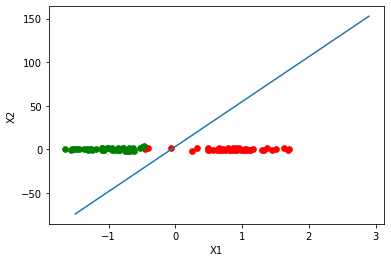

In [93]:
# Logic test
model = logistic_regression()
X_train, y_train, X_test, y_test = generate_test_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

cost_list, params, grads = model.logistic_train(X_train, y_train, 0.01, 1000)
print(params)

y_train_pred = model.predict(X_train, params)
accuracy_score_train = model.accuracy(y_train, y_train_pred)
print('train accuracy is:', accuracy_score_train)

y_test_pred = model.predict(X_test, params)
accuracy_score_test = model.accuracy(y_test, y_test_pred)
print('test accuracy is:', accuracy_score_test)

visualize_logistic(X_train, y_train, params)

In [94]:
# Доп задание
iris = datasets.load_iris(as_frame=True)
iris_df = iris.data

iris_df['target'] = pd.Series(iris.target)
iris_df = iris_df.loc[iris_df['target'] != 0]  # filter 'SETOSA' class
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


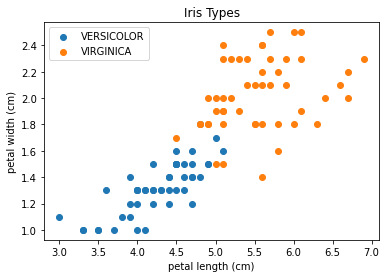

In [95]:
# List of suppported Iris classes.
iris_types = ['VERSICOLOR', 'VIRGINICA']

x_axis = 'petal length (cm)'
y_axis = 'petal width (cm)'

# Plot the scatter for every type of Iris.
for idx, iris_type in enumerate(iris_types):
    plt.scatter(
        iris_df[x_axis][iris_df['target'] == idx+1],
        iris_df[y_axis][iris_df['target'] == idx+1],
        label=iris_type
    )

# Plot the data.
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.title('Iris Types')
plt.legend()
plt.show()


(80, 4) (80, 1) (20, 4) (20, 1)
epoch 0 cost 0.693147
epoch 100 cost nan
epoch 200 cost nan
epoch 300 cost nan
epoch 400 cost nan
epoch 500 cost nan
epoch 600 cost nan
epoch 700 cost nan
epoch 800 cost nan
epoch 900 cost nan
{'W': array([[33.19731533],
       [14.83864225],
       [28.10367927],
       [ 9.97219369]]), 'b': 5.013584141280552}
train accuracy is: 0.5
test accuracy is: 0.5


<ipython-input-90-53e5b9d271f7>:19: RuntimeWarning: divide by zero encountered in log
  cost = -1 / num_train * np.sum(y * np.log(a) + (1 - y) * np.log(1 - a))
<ipython-input-90-53e5b9d271f7>:19: RuntimeWarning: invalid value encountered in multiply
  cost = -1 / num_train * np.sum(y * np.log(a) + (1 - y) * np.log(1 - a))


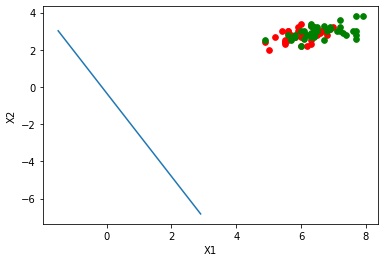

In [96]:
X, y = iris_df[iris.feature_names].values, iris_df['target'].values
y = y.reshape((-1, 1))

# Stratified k-fold cross validation
skf = StratifiedKFold(n_splits=5, random_state=None)

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

model = logistic_regression()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

cost_list, params, grads = model.logistic_train(X_train, y_train, 0.01, 1000)
print(params)

y_train_pred = model.predict(X_train, params)
accuracy_score_train = model.accuracy(y_train, y_train_pred)
print('train accuracy is:', accuracy_score_train)

y_test_pred = model.predict(X_test, params)
accuracy_score_test = model.accuracy(y_test, y_test_pred)
print('test accuracy is:', accuracy_score_test)

visualize_logistic(X_train, y_train, params)
